Testing the GRF DR on turbomachinery test case ([Blade A](https://github.com/psesh/turbodata/tree/master/three_blades/blade_A))

In [6]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from grf import grf_fit


In [3]:
X_train = np.loadtxt('bladeA_cs_training_inputs.dat')
X_test = np.loadtxt('bladeA_cs_validation_inputs.dat')
y_train = np.loadtxt('bladeA_cs_training_outputs.dat')
y_test = np.loadtxt('bladeA_cs_validation_outputs.dat')

d = 25
m = 2

M_guess = np.random.randn(d,m)
Q = np.linalg.qr(M_guess)[0]
M_guess = Q.copy()

In [4]:
M_final = grf_fit(M_guess, X_train, X_test, y_train, y_test, tol = 1e-3, verbosity=1)



Optimizing...
Terminated - min stepsize reached after 22 iterations, 0.51 seconds.

Optimizing...
Terminated - min stepsize reached after 6 iterations, 0.23 seconds.

Optimizing...
Terminated - min stepsize reached after 6 iterations, 0.22 seconds.



<IPython.core.display.Javascript object>


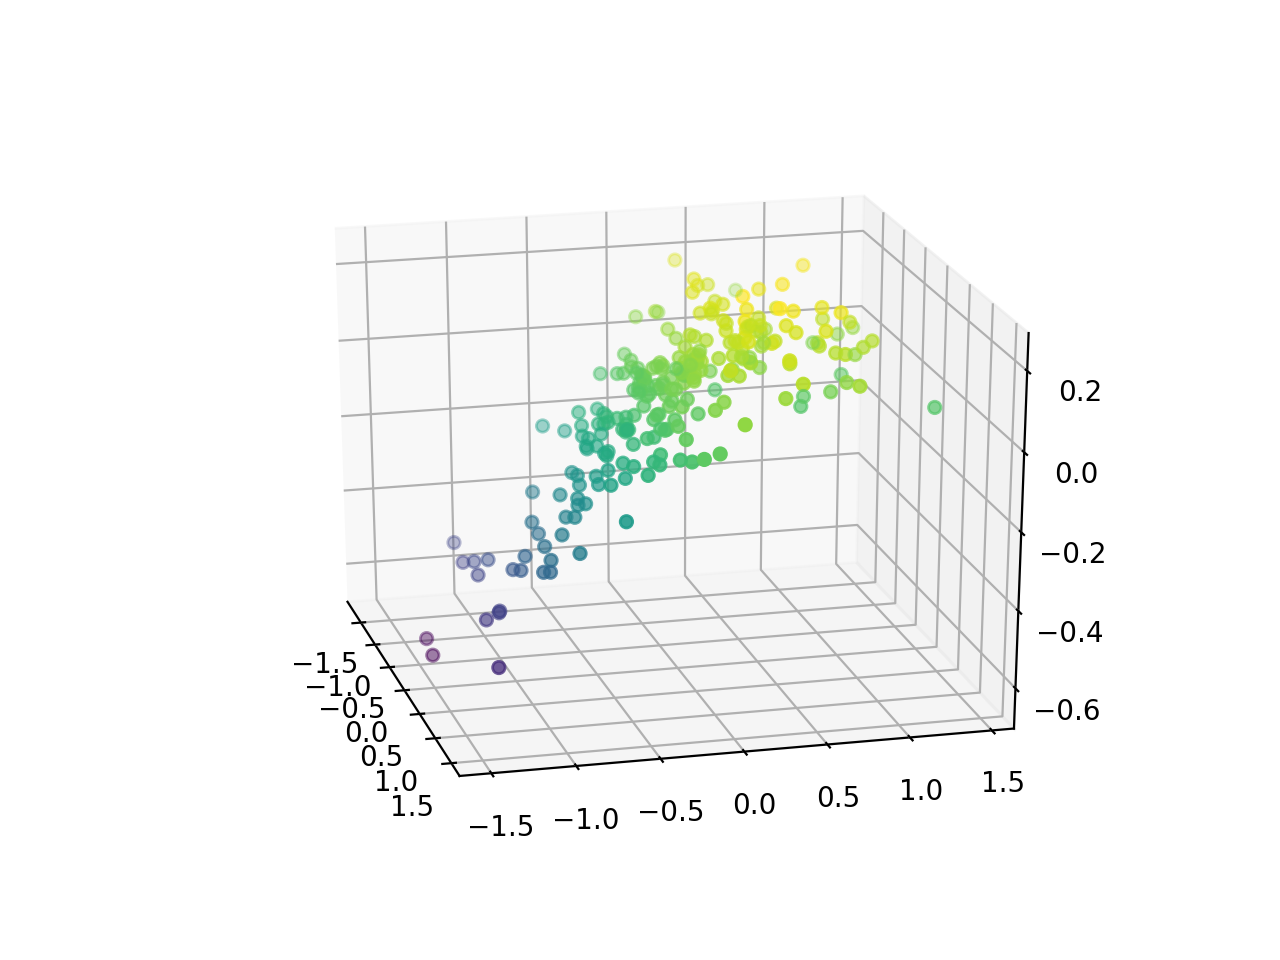

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
U_test = X_test @ M_final
ax.scatter(U_test[:,0], U_test[:,1], y_test, c=y_test)
plt.show()